In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
dataset = pd.read_csv('House_Data_BNG.csv')
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
dataset.shape

(13320, 9)

In [4]:
dataset.groupby('area_type')['area_type'].agg('count')
dataset.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [5]:
data2 = dataset.drop(['area_type','society','availability','balcony'],axis=1)

In [6]:
data2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
data3 = data2.dropna()
data3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
data3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Navya S Raj\.conda\envs\ML\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
data3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [11]:
# ## Python lambda functions

# x = lambda a: print(a**2)

# x(5)

In [12]:
data3[data3.bhk > 10]

,location,size,total_sqft,bath,price,bhk
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,150.0,11


In [13]:
data3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def check_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
data3[~data3.total_sqft.apply(check_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
def handle_range(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        output = (float(tokens[0])+float(tokens[1]))/2
        return output
    try:
        return float(x)
    except:
        return None

In [17]:
data4 = data3.copy()
data4['total_sqft'] = data4['total_sqft'].apply(handle_range)
data4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [18]:
data4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [19]:
data5 = data4.copy()

In [20]:
## Price per square feet

data5['price_per_squarefeet'] = data5['price']*100000 / data5['total_sqft'] 
data5.head()

,location,size,total_sqft,bath,price,bhk,price_per_squarefeet
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [21]:
### Checking locations 

len(data5.location.unique())

1304

In [22]:
data5['location'] = data5['location'].apply(lambda x: x.strip())

In [23]:
insights_locations = data5['location'].value_counts(ascending=False)

In [24]:
insights_locations.values.sum()
data5.isna().sum()

location                 0
size                     0
total_sqft              46
bath                     0
price                    0
bhk                      0
price_per_squarefeet    46
dtype: int64

In [25]:
## Find out loactions having less than 10 datapoints

len(insights_locations[insights_locations>10])

241

In [26]:
len(insights_locations)

1293

In [27]:
len(insights_locations[insights_locations<=10])

1052

In [28]:
locations_less_than_10 = insights_locations[insights_locations<=10]


In [29]:
len(data5.location.unique())

1293

In [30]:
data5.location = data5.location.apply(lambda x: 'other' if x in locations_less_than_10 else x)

In [31]:
data5

,location,size,total_sqft,bath,price,bhk,price_per_squarefeet
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


### Outlier Detection

- Extreme variations in your data

In [32]:
## Check for square foot per bedroom -> 1 BHK

data5.head()

,location,size,total_sqft,bath,price,bhk,price_per_squarefeet
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [33]:
data6 = data5[~(data5.total_sqft/data5.bhk<300)]
data6.shape

(12502, 7)

In [34]:
#### Check out the price per squarefeet


data6.price_per_squarefeet.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_squarefeet, dtype: float64

In [35]:
x = data6.groupby('location').sum()
x

,total_sqft,bath,price,bhk,price_per_squarefeet
location,,,,,
1st Block Jayanagar,19150.00,31.0,2541.000,32,1.235925e+05
1st Phase JP Nagar,41416.00,71.0,4027.500,69,2.237073e+05
2nd Phase Judicial Layout,12906.00,23.0,508.000,27,4.453571e+04
2nd Stage Nagarbhavi,19150.00,42.0,2431.000,41,1.294315e+05
5th Block Hbr Layout,14788.00,22.0,878.000,24,4.635484e+04
...,...,...,...,...,...
Yelahanka,364088.50,504.0,17248.285,515,1.067003e+06
Yelahanka New Town,46190.00,73.0,3404.500,81,2.227051e+05
Yelenahalli,16490.00,28.0,660.390,29,5.216316e+04


In [43]:
def outliers_rm_price_sqft(data):
    data_to_return=pd.DataFrame()
    for key,subdata in data6.groupby('location'):
        mean = np.mean(subdata.price_per_squarefeet)
        stdv = np.std(subdata.price_per_squarefeet)
        reduced_data = subdata[(subdata.price_per_squarefeet > (mean-stdv)) & (subdata.price_per_squarefeet <= (mean+stdv))] 
        data_to_return = pd.concat([data_to_return,reduced_data],ignore_index=True)
    return data_to_return
    


In [44]:
data7=outliers_rm_price_sqft(data6)

In [45]:
data7

,location,size,total_sqft,bath,price,bhk,price_per_squarefeet
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [46]:
data7.isna().sum()

location                0
size                    0
total_sqft              0
bath                    0
price                   0
bhk                     0
price_per_squarefeet    0
dtype: int64

In [47]:
def scatterplot(data,location):           #CHECK PRICES OF 2BHK & 3BHK PRICES
    bhk_2=data[(data.location==location) & (data.bhk==2)]
    bhk_3=data[(data.location==location) & (data.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk_2.total_sqft,bhk_2.price,color='blue',label='2 BHK')
    plt.scatter(bhk_3.total_sqft,bhk_3.price,color='green',label='3 BHK')
    plt.show()
   

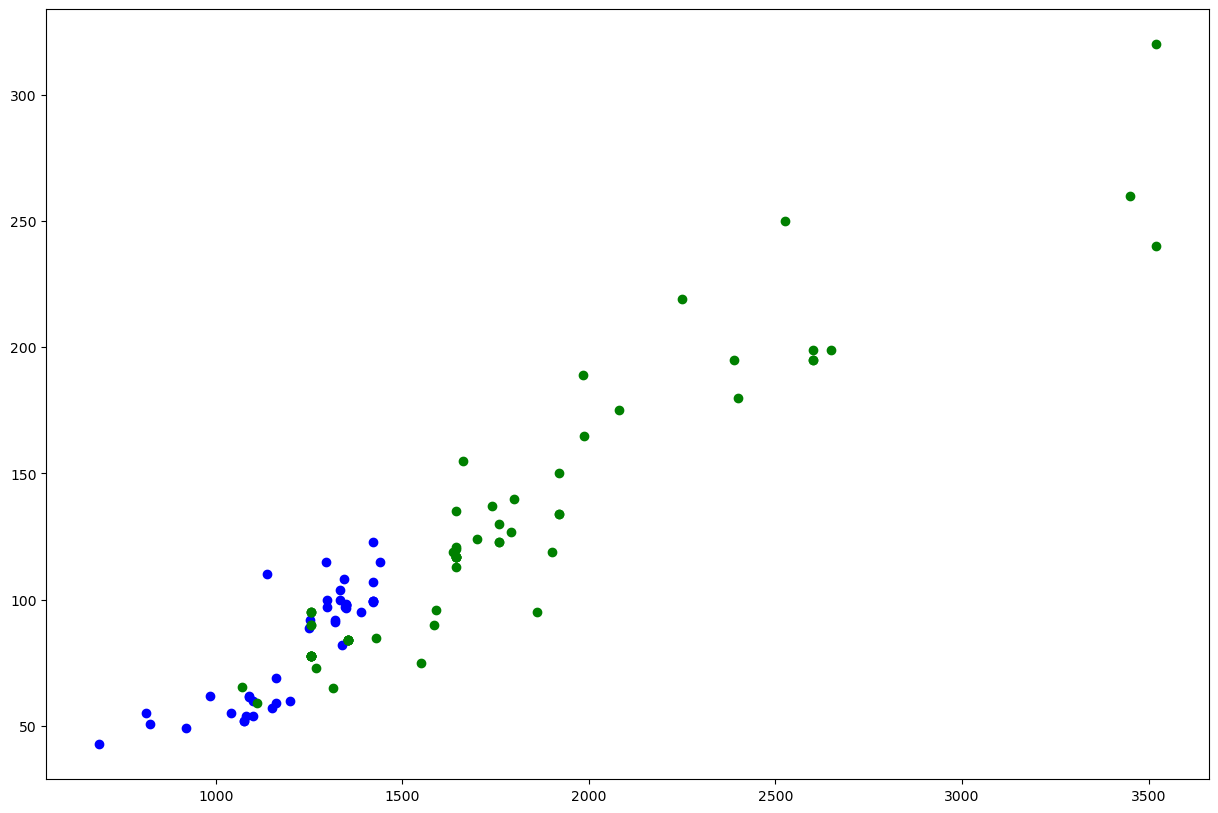

In [48]:
scatterplot(data7,'Hebbal')

In [ ]:
def ter_outloers_bhk(data):
    rem_indices=np.array([])
    for location,location_data in data.groupby('location'):
        BHK_staks = {}
        for bhk,bhk_data in location_data.groupby('bhk'):
            BHK_stas[bhk]={
                'mean': no.mean(bhk_data.price_per_squarefeet),
                'std': np.std(bhk_data.price_per_squarefeet),
                'count': bhk_data.shape[0]
            }
        for bhk,bhk_data in location_data.groupby('BHK'):
            stat_bhk=stats.bhk.get(bhk-1)
            if stat_bhk and stat_bhk['count']>5:
                rem_indices=np.append(rem_indices,bhk_data.price_per_squarefeet<(stat_bhk['mean']).index.